# Lab Comparing regression models. Check end of the Notebook

### BEFORE... Lab_Transformation & MODEL Fitting & Evaluation and Improving

### 1. Check if there are highly correlated features and drop them if there are any.
### 2. One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).
### 3. for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [17]:
df_marketing = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')


df_marketing

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [18]:
df_numerical = df_marketing.select_dtypes(include=np.number)
df_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


<AxesSubplot:>

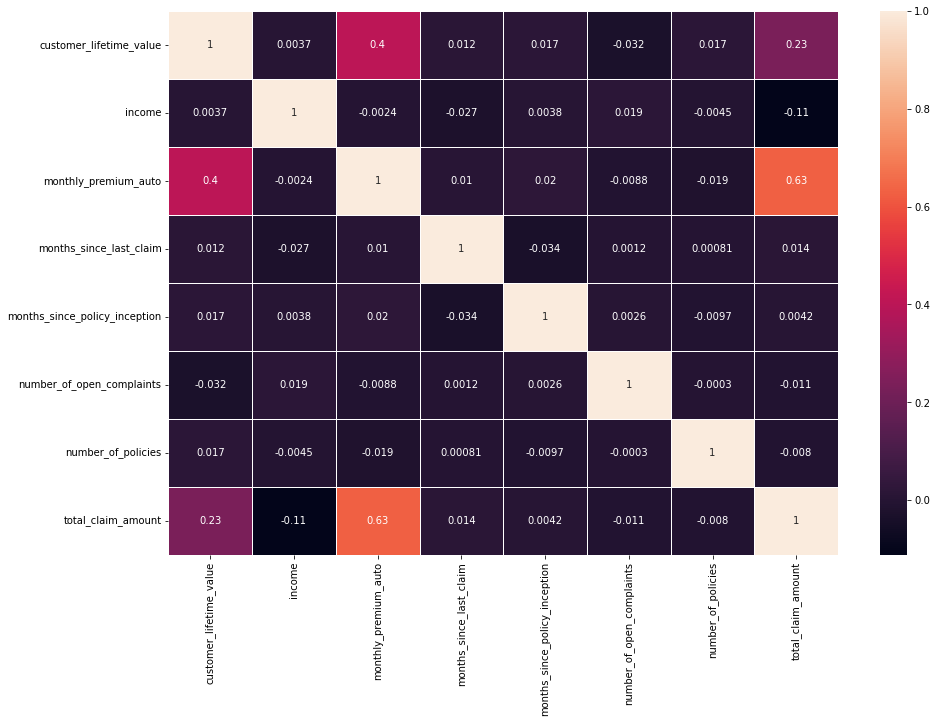

In [19]:
#Plot the Correlation Heatmap.

fig=plt.figure(figsize=(15,10))
sns.heatmap(df_numerical.corr(),annot=True, linewidth= 1)

In [20]:
df_categorical = df_marketing.select_dtypes(exclude=np.number)
df_categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [21]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale

In [22]:
df_categorical_code = pd.get_dummies(df_categorical, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [23]:
df_categorical_code

,region_central,region_east,region_north west,region_west region,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,education_bachelor,...,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small
0,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,0,0,1,0,0,0,1,1,...,1,0,1,0,0,0,0,0,1,0
10685,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
10686,1,0,0,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
10687,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


(array([2.889e+03, 5.523e+03, 1.506e+03, 4.610e+02, 2.140e+02, 4.200e+01,
        3.200e+01, 1.500e+01, 5.000e+00, 2.000e+00]),
 array([   0. ,  289.3,  578.6,  867.9, 1157.2, 1446.5, 1735.8, 2025.1,
        2314.4, 2603.7, 2893. ]),
 <BarContainer object of 10 artists>)

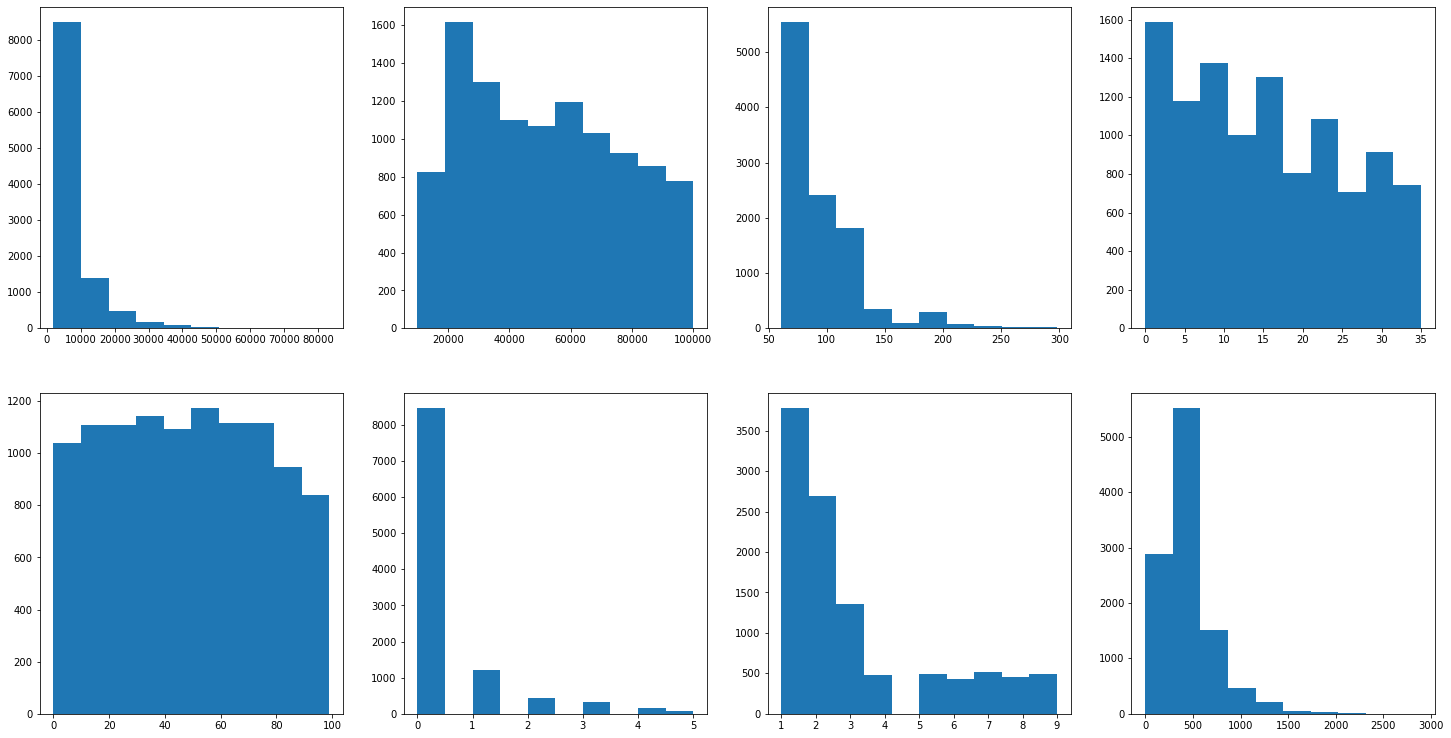

In [24]:
#distribution with hist()

fig3, axes3 = plt.subplots(2,4,figsize = (25,13))

# plot the hist chart
axes3[0,0].hist(df_numerical.customer_lifetime_value)
axes3[0,1].hist(df_numerical.income )
axes3[0,2].hist(df_numerical.monthly_premium_auto )
axes3[0,3].hist(df_numerical.months_since_last_claim )
axes3[1,0].hist(df_numerical.months_since_policy_inception )
axes3[1,1].hist(df_numerical.number_of_open_complaints )
axes3[1,2].hist(df_numerical.number_of_policies )
axes3[1,3].hist(df_numerical.total_claim_amount)

## varA = income
Use minmax transform to bring varA's values into the range [0,1].
Check that varA has been rescaled using a distplot or a histagram

In [25]:
from sklearn.preprocessing import MinMaxScaler

x = df_numerical['income'].values.reshape(-1,1)

scaler = MinMaxScaler()
print(scaler.fit(df_numerical))

MinMaxScaler()


In [26]:
df_numerical['income']

0        48029
1        92260
2        22139
3        49078
4        23675
         ...  
10684    61541
10685    61146
10686    39837
10687    64195
10688    68942
Name: income, Length: 10689, dtype: int64


## varB = customer_lifetime_value
Use StandardScalar or PowerTransform to reduce the skew and standardize varB's distribution.
Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

customer_lifetime_value
monthly_premium_auto
total_claim_amount

## PowerTransformer() ⚠️ 

In [27]:
from sklearn.compose import ColumnTransformer

In [28]:
df_categorical.columns

Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [29]:
df_numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [30]:
cols_to_hot_encode = ['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size']

cols_to_standardize = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies']

# Day 2. Predictive Modeling

## X Y split

In [31]:
X=df_numerical.drop('total_claim_amount', axis=1)
y=df_numerical.total_claim_amount


In [32]:
X=X._get_numeric_data()
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,92260,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


In [33]:
df_categorical_encode = pd.get_dummies(df_categorical, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)


In [34]:
df_categorical_encode

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [35]:
d = df_numerical.merge(df_categorical_encode, left_index=True, right_index=True) 
d

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,292,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,92260,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,484,0,1,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,33,31,0,7,707,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,273,0,1,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,381,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,618,0,0,...,1,0,0,0,0,0,1,0,1,0


In [36]:
from sklearn.preprocessing import OneHotEncoder


transformer = ColumnTransformer([
    ('standardize', StandardScaler(), cols_to_standardize),
    ('encode', OneHotEncoder(), cols_to_hot_encode)
], remainder = 'passthrough', verbose_feature_names_out=True)

#transformer.fit(X_train)

### Data Splitting


In [37]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

### Standardize


In [38]:

std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [39]:
X_train.shape


(7482, 7)

In [40]:
X_test_scaled=std_scaler.transform(X_test)

In [41]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.27291744 -0.67143823 ...  1.36516733 -0.42500069
  -0.40381143]
 [-0.42794064  0.74729478 -0.72925469 ...  1.68786198 -0.42500069
   0.84759702]
 [-0.5223013   0.26592193  0.48489091 ...  0.50464827 -0.42500069
  -0.82094758]
 ...
 [-0.81132612 -1.17224873 -0.90270406 ... -1.39566466 -0.42500069
  -0.82094758]
 [ 2.25575772  0.98537142 -0.78707115 ... -1.61079442 -0.42500069
  -0.40381143]
 [ 1.18923585  0.68583346 -0.55580532 ...  0.21780858  1.78399907
  -0.40381143]]
--------
[[-0.40967729  1.58428551 -0.61362178 ...  1.54444214 -0.42500069
   2.51614162]
 [-0.7597249  -0.93947257 -0.64253    ...  0.755633    0.67949919
  -0.82094758]
 [ 0.57248529 -1.23371005 -0.90270406 ...  0.39708339 -0.42500069
  -0.40381143]
 ...
 [-0.79857077 -1.05867274 -0.58471355 ... -1.18053489 -0.42500069
  -0.82094758]
 [-0.42547654 -0.97370317 -0.81597938 ... -1.61079442  0.67949919
   0.43046087]
 [-0.49881985 -0.95695203  0.71615674 ... -1.00126009 -0.42500069
  -0.82094758]]


# Apply Linear Regression
## Modeling using Statsmodels

In [42]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     742.9
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:11:53   Log-Likelihood:                -51168.
No. Observations:                7482   AIC:                         1.024e+05
Df Residuals:                    7474   BIC:                         1.024e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      2.612    165.770      0.0

## Modeling using Scikit Learn
### Model fitting


In [43]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [44]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
6608,7271,20545,70,23,86,0,2
5697,5079,70474,68,6,95,0,5
10524,4428,58577,110,6,62,0,1
397,22332,49078,97,10,3,0,2
6324,2430,26182,70,29,30,0,1
...,...,...,...,...,...,...,...
9785,3086,73938,76,34,48,0,1
7763,5658,78834,72,14,20,2,8
5218,2434,23033,62,5,9,0,1
1346,23594,76358,66,25,3,0,2


In [45]:
y_train

6608     336
5697     326
10524    303
397      484
6324     341
        ... 
9785      53
7763     345
5218     500
1346      86
3582     680
Name: total_claim_amount, Length: 7482, dtype: int64

In [46]:
model.coef_

array([ -6.5986299 , -33.18126217, 187.80190938,   1.90598135,
        -0.91148552,   1.71705592,  -2.32015745])

In [47]:
model.intercept_


433.0597433841219

### Making prediction


In [48]:

y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [49]:
y_pred

array([260.52304948, 353.76752657, 297.68091412, ..., 367.57334203,
       317.67903438, 608.06079373])

In [50]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

# Day 3.  Predicting on new data


In [51]:
np.array(np.array(new_data).reshape(-1,7)).shape


NameError: name 'new_data' is not defined

In [ ]:
new_data = np.array([0, 1, 0, 0, 0, 1, 0]).reshape(-1,7)

#1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0


In [ ]:
new_data_scaled=std_scaler.transform(new_data)

In [ ]:
model.predict(new_data_scaled)

## Evaluating Model Performance


In [ ]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

In [ ]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

### more fancy using seaborn


In [ ]:

sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

### Error metrics


In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

In [ ]:
##prediction on the train set
mse(y_train,y_pred_train)

In [ ]:
from sklearn.metrics import r2_score

R2=r2_score(y_test,y_pred)
R2

In [ ]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

In [ ]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

### getting the number of parameters


In [ ]:
X_test.shape[1]

### Feature Importance


In [ ]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [ ]:
features_importances


In [ ]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Write a csv
With to_csv


In [ ]:
#Data/Data_Marketing_Customer_Analysis_Round3

df_marketing = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')


df_marketing


In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))


In [ ]:
mse(y_train,y_pred_train)


In [ ]:
from sklearn.metrics import r2_score
R2=r2_score(y_test,y_pred)
R2

In [ ]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

In [ ]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

# Lab Comparing regression models

Lab | Comparing regression models
For this lab, we will be using the same dataset for the customer analysis case study we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions


1. fit the models LinearRegressor,Lasso,Ridge and (optional KNeighborsRegressor ) and compare the model performances.

2. (Optional) Define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

3. Use feature selection techniques(P-Value, RFE) to select subset of features to train the model with(if necessary).


4. (optional) refit the models with the selected features.

In [86]:
#NOTEBOOKS:
- http://localhost:8888/notebooks/Documents/GitHub/LAB-Sara/Rafas_repository/Data_PreProcessing_Feature_Selection%20copy.ipynb#Embedded-Methods
- http://localhost:8888/notebooks/Documents/GitHub/IH_RH_DA_FT_OCT_2022/Class_Materials/Data%20Processing/P-Value.ipynb

SyntaxError: invalid syntax (641400220.py, line 1)

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## LOAD DATA "AGAIN"

In [ ]:
df_marketing


In [ ]:
list(df_marketing.columns)

### Defining X, y


In [ ]:
X = df_marketing.drop(columns=['total_claim_amount'], axis = 1)
y = df_marketing['total_claim_amount']

### Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
X_train.describe()

## Variance threshold method

Variance threshold method is a FILTER METHOD, that removes features that have a variance below a threshold. 
The default value is 0 which means tahta if all the values in a column are the same, that colum will have no variance and that column would be removed. 

In [ ]:
from sklearn.feature_selection import VarianceThreshold # It only works with numerical features


X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

#display(X_train)
print("Initial number of numerical columns: ",X_train.shape)
print()


selector = VarianceThreshold(threshold=100) # Default threshold value is 0
# Features with a training-set variance lower than this threshold will be removed.
selector.fit(X_train)

kept_features_indexes = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features_indexes].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final number of numerical columns: ",X_train.shape)
print()
X_train

## Correlation matrix

Correlation is a univaraite selection technique (where each feature is evaluated independently with the Target)

['monthly_premium_auto', 'total_claim_amount']


,monthly_premium_auto,total_claim_amount
0,61,292
1,64,744
2,100,480
3,97,484
4,117,707
...,...,...
10684,253,1214
10685,65,273
10686,201,381
10687,158,618


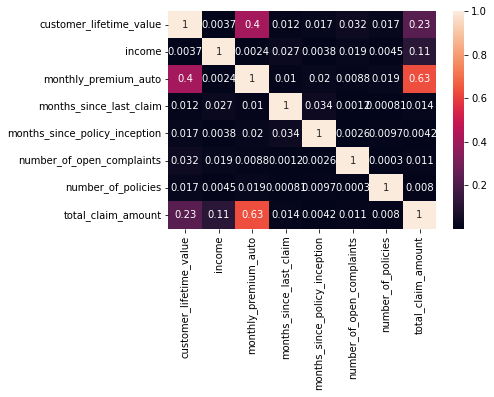

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

c = abs(df_marketing.corr())
#c

#fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(c, annot=True);

#c['total_claim_amount']
c_last = c['total_claim_amount'].sort_values(ascending=False)
#c_last
c_thr = .3
cols_to_keep = list(c_last[c_last > c_thr].index)[1:] + [list(c_last[c_last > c_thr].index)[0]]
print(cols_to_keep)

df_marketing[cols_to_keep]

## Recursive feature elimination


Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. 

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE  ## recursive feature elemination technique

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#X_train.isna().sum()
nulls = pd.DataFrame(X_train.isna().sum()).reset_index()
#nulls.head()
nulls.columns = ['Column','nas']
#nulls.head()
#nulls[nulls['nas'] > 0].head()
cols_to_drop = nulls[nulls['nas'] > 0]['Column'] # Too drastic, but made on pourpose for quick filtering (don't do this in production!!)

X_train.drop(columns=cols_to_drop, axis=1, inplace = True)
X_test.drop(columns=cols_to_drop, axis=1, inplace = True)

#display(X_train)

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 8, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Final selected features: 


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,21423,22379,65,9,31,0,2
1,8391,40211,106,5,98,2,6
2,3969,49544,101,3,29,0,1
3,14914,45963,63,3,73,2,2
4,18060,57882,115,1,61,0,2
...,...,...,...,...,...,...,...
8546,7610,98701,94,22,66,0,3
8547,35186,86134,98,17,78,0,2
8548,4241,19834,64,26,8,4,8
8549,12941,77060,106,23,90,0,2


## Embedded Methods

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

In [63]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train=imp_mean.fit_transform(X_train)
x_test= imp_mean.fit_transfrom(X_test)

AttributeError: 'SimpleImputer' object has no attribute 'fit_transfrom'

## OLS

In [61]:
model=LinearRegression()
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

LinearRegression: Train -> 0.4086926440650056, Test -> 0.41140062170554004


/Users/saori/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
#if the error train is lower thant the error test is okay 

lasso model   could drop features and make it a feature selection technique 

In [64]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0.05)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.4086926032425867, Test -> 0.41141620918570554


/Users/saori/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


<b> Ridge

In [70]:
model=Ridge(alpha=0.05)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.4086926440650035, Test -> 0.4114006249953256


/Users/saori/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


<b> ElasticNet

In [68]:
model=ElasticNet(alpha=0.1)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

ElasticNet: Train -> 0.40869238511331907, Test -> 0.4114386909519817


/Users/saori/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


In [75]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.datasets import load_boston

## Fitting OLS model

In [85]:
x = df_marketing
y = x.total_claim_amount
X = pd.DataFrame(x, columns = x.feature_names)

X_added_constant = sm.add_constant(X)
X_added_constant

AttributeError: 'DataFrame' object has no attribute 'feature_names'